In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [3]:
API_KEY = 'EK64R9CL2XZ2S6VX'

In [4]:
stock = "AAPL"

In [5]:
url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock}&apikey={API_KEY}"

In [6]:
response = requests.get(url)

In [7]:
data = response.json()

In [8]:
# answer

df = pd.DataFrame(data["Time Series (Daily)"]).T.reset_index()
df.head()

,index,1. open,2. high,3. low,4. close,5. volume
0,2024-11-20,228.0600,229.9300,225.8900,229.0000,35169566
1,2024-11-19,226.9800,230.1600,226.6600,228.2800,36211774
2,2024-11-18,225.2500,229.7400,225.1700,228.0200,44686020
3,2024-11-15,226.4000,226.9200,224.2700,225.0000,47923696
4,2024-11-14,225.0200,228.8700,225.0000,228.2200,44923941


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      100 non-null    object
 1   1. open    100 non-null    object
 2   2. high    100 non-null    object
 3   3. low     100 non-null    object
 4   4. close   100 non-null    object
 5   5. volume  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [48]:
# DataTypes of DataFrame

print("index", type(df.index))
print("columns", type(df.columns))
print("values", type(df.values))
print()
print("df-col", type(df.iloc[:, 0]))
print("df-row", type(df.iloc[[0]]))

# df.iloc[:, 0]
# df.iloc[[0]]

index <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
columns <class 'pandas.core.indexes.base.Index'>
values <class 'numpy.ndarray'>

df-col <class 'pandas.core.series.Series'>
df-row <class 'pandas.core.frame.DataFrame'>


In [11]:
# answer

df["high"] = df["2. high"].apply(lambda x: float(x))
df[df["high"] == df["high"].max()]["index"].iloc[0]

'2024-10-15'

In [12]:
# solution

d = data["Time Series (Daily)"]
df = pd.DataFrame.from_dict(d, orient="index")

In [13]:
# rename all columns to '1. open' > 'Open'

In [14]:
# answer

old_cols = df.columns
new_cols = df.columns.map(lambda c: c[3:])

In [15]:
for col in df.columns:
    new_col = col.split()[-1].capitalize()
    df.rename(columns={col:new_col}, inplace=True)

In [16]:
df = df.applymap(pd.to_numeric)

In [17]:
df.index = pd.to_datetime(df.index)

In [18]:
df = df[::-1].copy()

In [19]:
df["MA"] = df["Close"].rolling(10).mean()

In [20]:
df.head(10)

,Open,High,Low,Close,Volume,MA
2024-07-02,216.15,220.38,215.1000,220.27,58046178,NaN
2024-07-03,220.00,221.55,219.0300,221.55,37369801,NaN
2024-07-05,221.65,226.45,221.6500,226.34,60412408,NaN
2024-07-08,227.09,227.85,223.2500,227.82,59085861,NaN
2024-07-09,227.93,229.40,226.3721,228.68,48169822,NaN
2024-07-10,229.30,233.08,229.2500,232.98,62627687,NaN
2024-07-11,231.39,232.39,225.7700,227.57,64710617,NaN
2024-07-12,228.92,232.64,228.6800,230.54,53046527,NaN
2024-07-15,236.48,237.23,233.0900,234.40,62631252,NaN
2024-07-16,235.00,236.27,232.3300,234.82,43234278,228.497


In [27]:
max_day = df[df["Close"] == df["Close"].max()]
max_day

,Open,High,Low,Close,Volume,MA
2024-10-21,234.45,236.85,234.45,236.48,36254470,231.246


In [28]:
min_day = df[df["Close"] == df["Close"].min()]
min_day

,Open,High,Low,Close,Volume,MA
2024-08-06,205.3,209.99,201.07,207.23,69660488,216.783


In [29]:
# plot Close as a line
# plot MA as a line
# plot higest_day and lowest_day as scatter

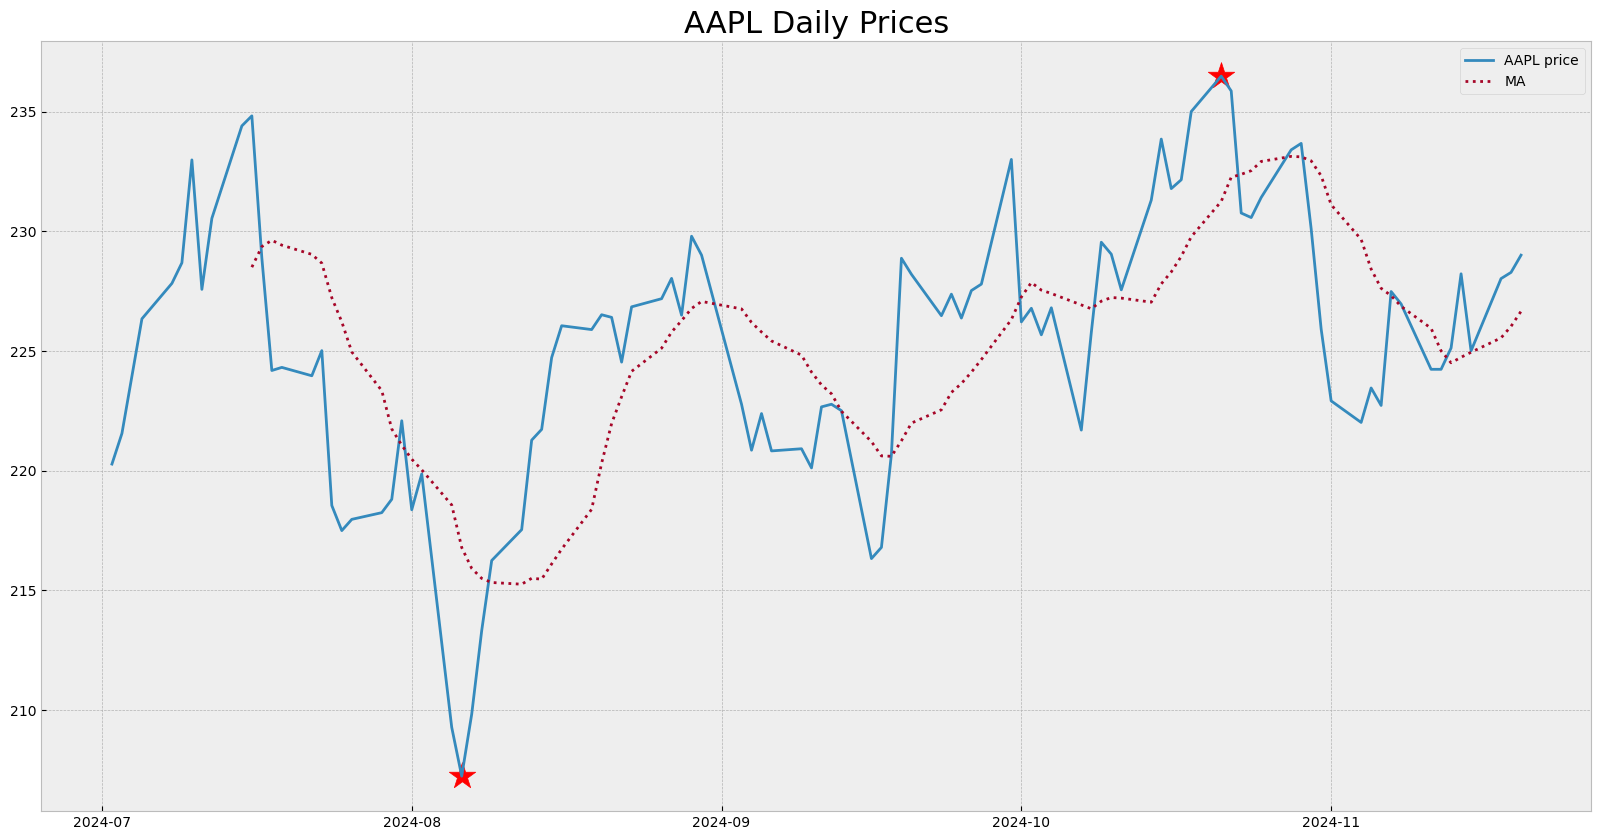

In [34]:
plt.figure(figsize=(20,10))
plt.style.use("bmh")

plt.plot(df.index, df["Close"], label=f"{stock} price")
plt.plot(df.index, df["MA"], linestyle=":", label="MA")
plt.scatter(max_day.index, max_day["Close"], marker="*", s=400, c="red")
plt.scatter(min_day.index, min_day["Close"], marker="*", s=400, c="red")

plt.title(f"{stock} Daily Prices", fontsize=22)
plt.legend()
plt.show()

In [49]:
returns = df["Close"].pct_change()

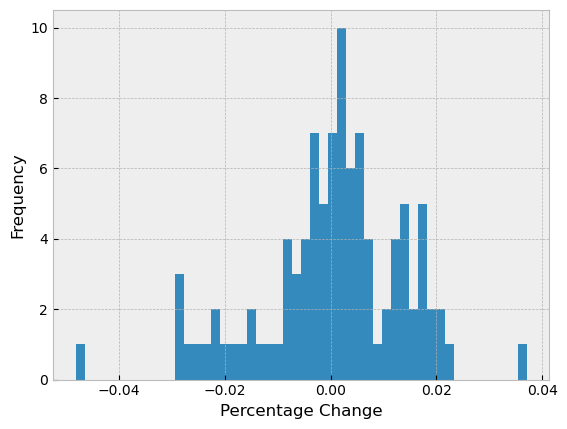

In [52]:
plt.hist(returns, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Percentage Change")
plt.show()